In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('.\\data\\cleaning_data.csv')
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Resolution_type,Cpu_speed,Cpu_mark,Memory_GB,Memory_kind,Price
106,Lenovo,Notebook,14.0,1920x1080,8.0,Intel HD Graphics 620,Windows 10,1.58,Full HD,2.7,Intel,256.0,SSD,78854.4000
1004,HP,Notebook,14.0,1920x1080,8.0,Intel HD Graphics 520,Windows 7,1.95,Full HD,2.3,Intel,256.0,SSD,63669.6000
1190,MSI,Gaming,15.6,1920x1080,8.0,Nvidia GeForce GTX 1060,Windows 10,2.20,Full HD,2.6,Intel,128.0,SSD,78647.1408
380,Acer,Notebook,15.6,1366x768,12.0,Nvidia GeForce MX130,Windows 10,2.20,unknown,1.6,Intel,1024.0,HDD,36975.7872
830,Asus,Notebook,15.6,1920x1080,8.0,Nvidia GeForce GTX 930MX,Windows 10,2.30,Full HD,2.7,Intel,256.0,SSD,41931.3600
1146,Lenovo,Notebook,15.6,1920x1080,4.0,Intel HD Graphics 520,Windows 7,2.32,Full HD,2.5,Intel,1024.0,Hybrid,43956.0000
975,Toshiba,Notebook,13.3,1920x1080,4.0,Intel HD Graphics 520,Windows 10,1.20,Full HD,2.3,Intel,128.0,SSD,63669.6000
157,Lenovo,Gaming,15.6,1920x1080,16.0,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,Full HD,2.8,Intel,256.0,SSD,57489.1200
823,Asus,Ultrabook,13.3,1920x1080,8.0,Nvidia GeForce 940M,Windows 10,1.45,Full HD,2.3,Intel,512.0,SSD,54665.2800
22,Dell,2 in 1 Convertible,13.3,1920x1080,8.0,Intel UHD Graphics 620,Windows 10,1.62,Full HD,1.6,Intel,256.0,SSD,43636.3200


In [3]:
# Basic statistics for numeric data.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1271.0,15.132258,1.954530,10.1000,14.00,15.60,15.6000,35.60
Ram,1271.0,8.463415,5.568758,1.0000,4.00,8.00,8.0000,64.00
Weight,1271.0,2.077852,0.808083,0.0002,1.50,2.04,2.3200,11.10
Cpu_speed,1271.0,2.298914,0.507129,0.9000,2.00,2.50,2.7000,3.60
Memory_GB,1271.0,448.210858,366.893638,0.0000,256.00,256.00,512.0000,2048.00
Price,1271.0,59888.473922,37309.185217,9270.7200,31914.72,52054.56,79274.2464,324954.72


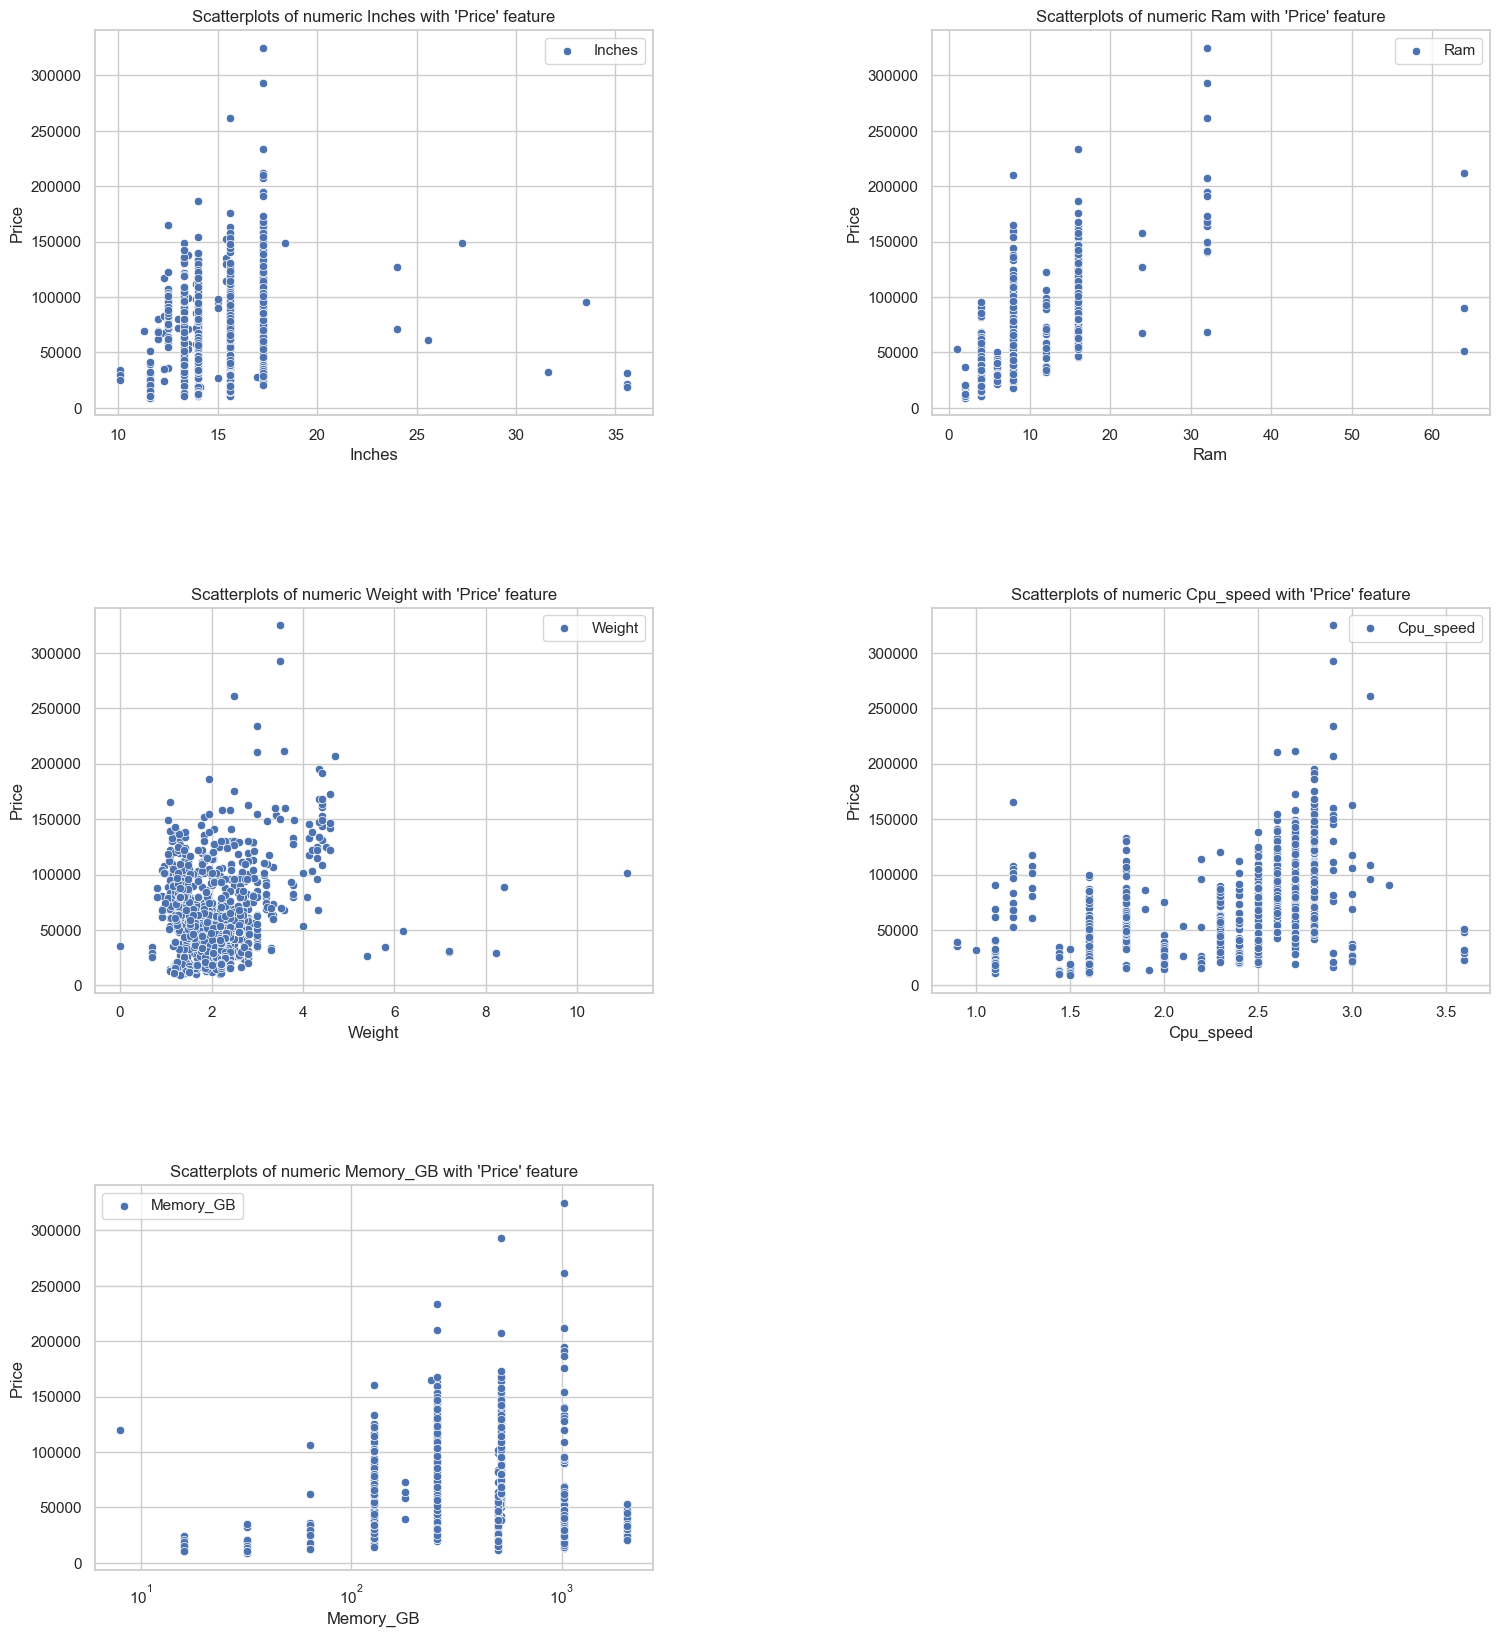

In [5]:
# Let's display scatterplots showing the relationship between numeric features and feature 'Price'

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'Cpu_speed', 'Memory_GB']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    if cols == 'Memory_GB':
        plt.xscale('log')
    sns.scatterplot(x=cols, y='Price', data=data, label=cols)
    plt.ylabel('Price')
    plt.title(f"Scatterplots of numeric {cols} with 'Price' feature")
plt.show()

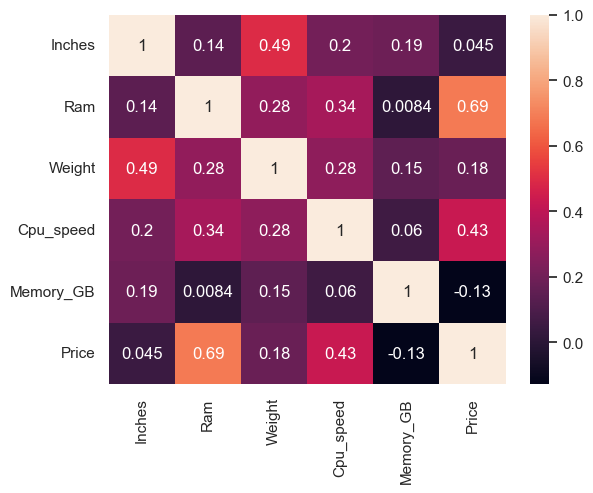

In [13]:
# we see that the rare variable is not clearly correlated with the 'Price' predicted variable. 
# On the other hand, there are also noticeable tendencies of increase in the value of the 'Price' variable along with increases in the describing variables. 
# Two variables that we can potentially exclude from the model are 'Inches' and 'Weight'.

# Let's see the Pearson correlation matrix between numeric variables.

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Inches', 'Ram', 'Weight', 'Cpu_speed', 'Memory_GB', 'Price']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
# We see two important things:
# - there is a significant correlation between the 'Ram' and 'Price' variables
# - the correlation of the 'Inches', 'Weight' and 'Memory_GB' variables with the 'Price' variable is less than 0.2. 
# These are the variables we will potentially exclude from the model.

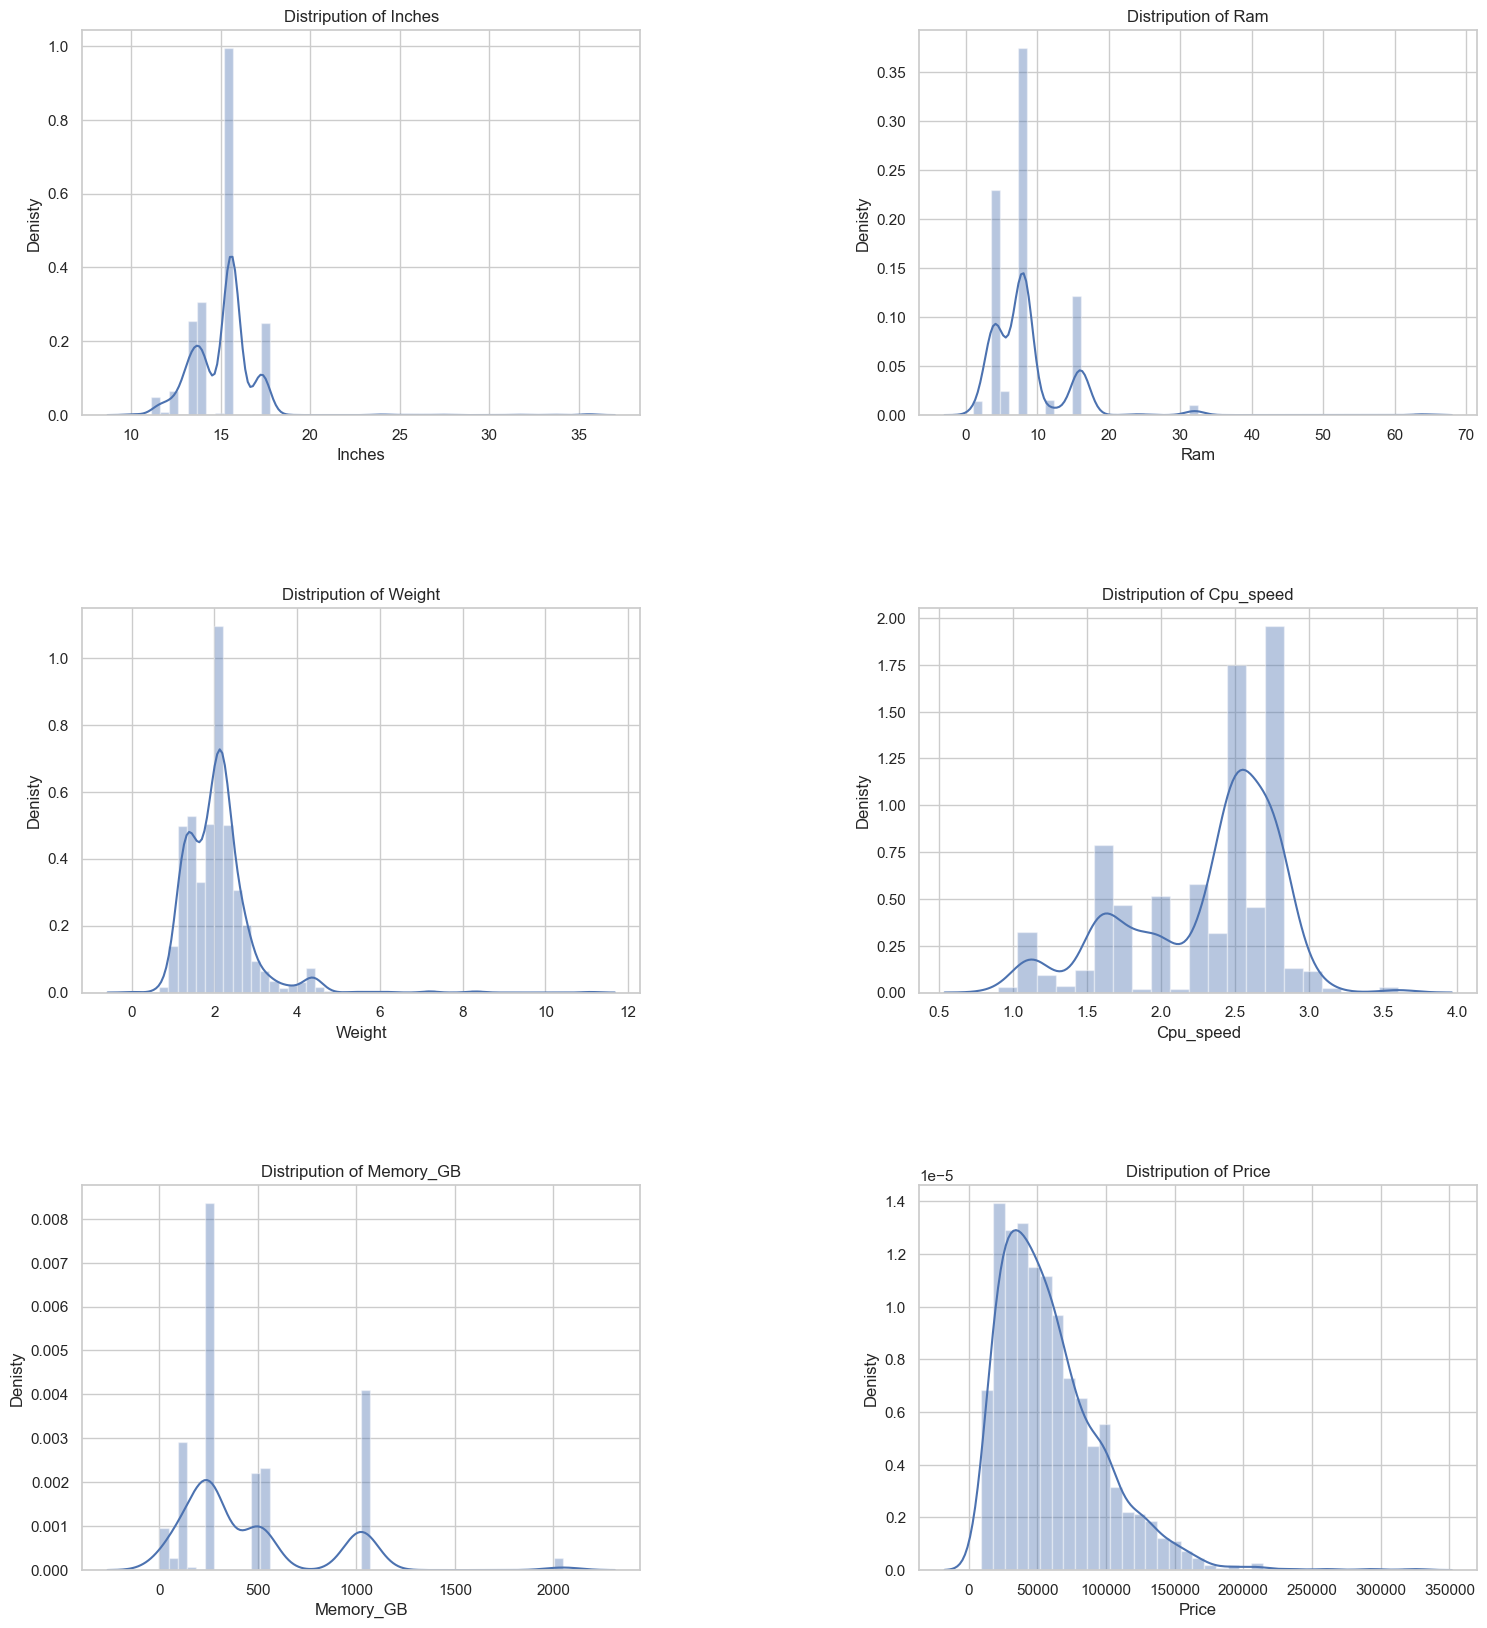

In [19]:
# Let's see the histograms for numeric variables along with the estimated distribution density line.

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'Cpu_speed', 'Memory_GB', 'Price']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[cols])
    plt.ylabel('Denisty')
    plt.title(f"Distripution of {cols}")
plt.show()

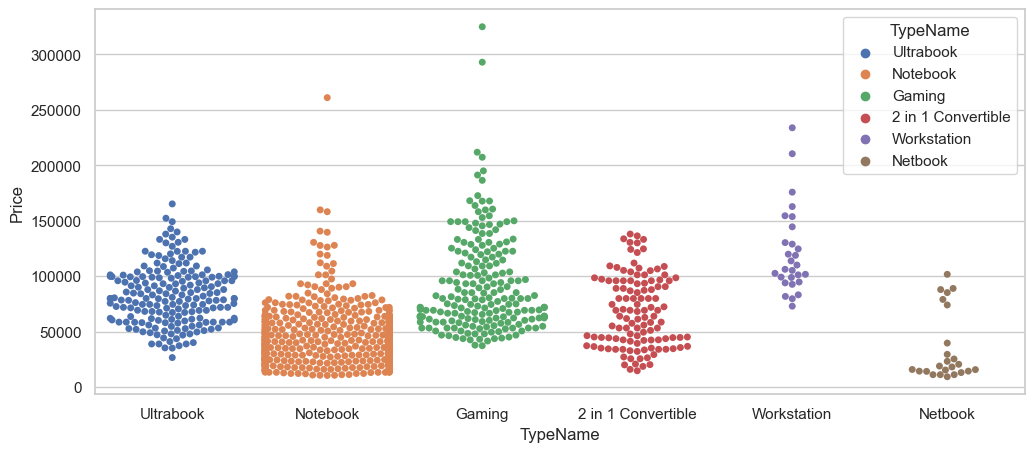

In [20]:
plt.figure(figsize=(12,5))
sns.swarmplot(data=data,x=data['TypeName'],y=data['Price'],hue=data['TypeName'])
plt.show()

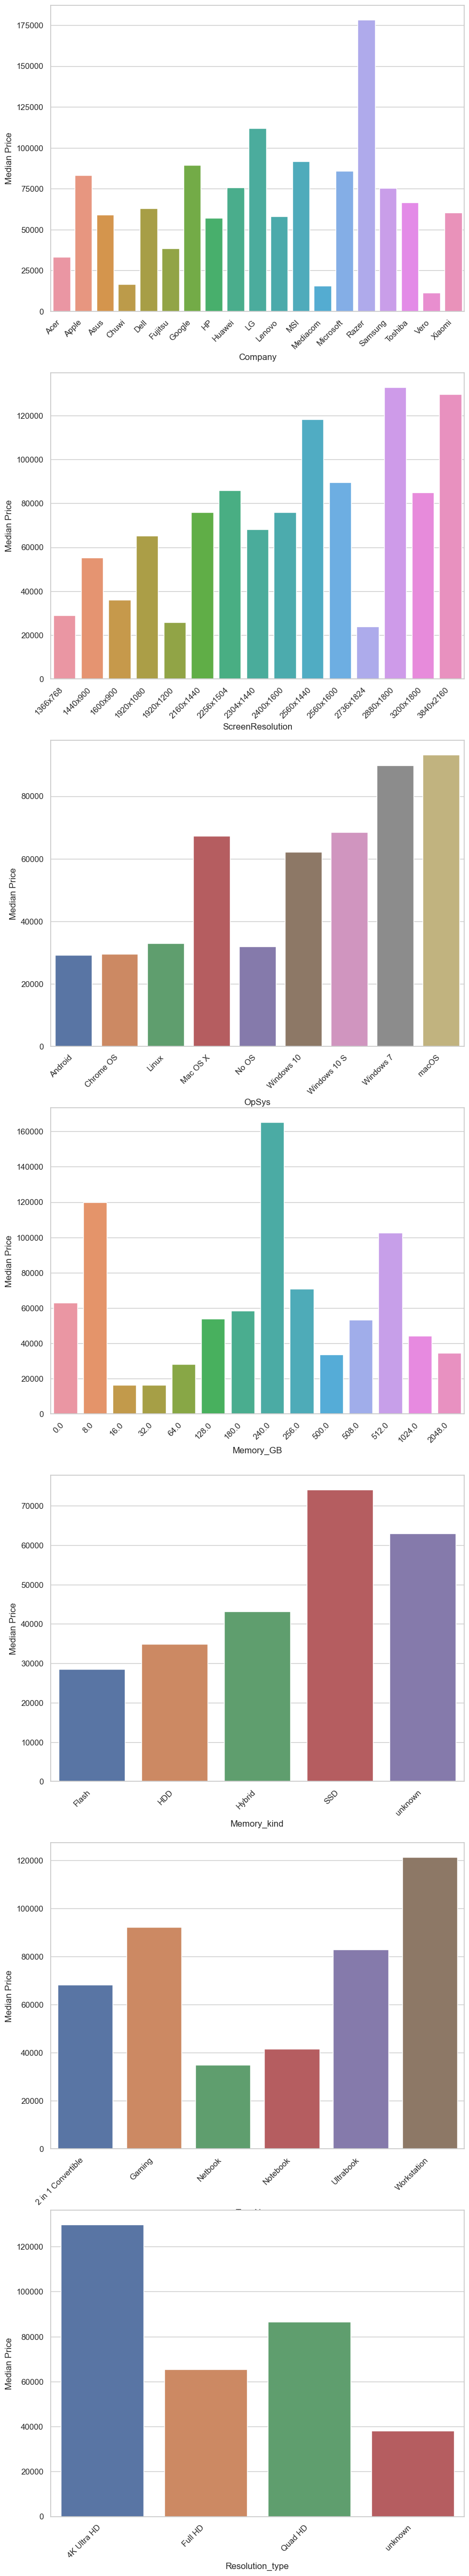

In [21]:


plt.figure(1, figsize=(10,70))
categorical_features = ['Company', 'ScreenResolution', 'OpSys', 'Memory_GB', 'Memory_kind', 'TypeName', 'Resolution_type']
n=0
for col in categorical_features:
    n += 1
    plt.subplot(8, 1, n)
    df_grouped = data.groupby(col)['Price'].mean().reset_index()
    sns.barplot(x=col, y="Price", data=df_grouped)
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Median Price")
plt.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


column_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Weight', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Cpu_mark', 'Memory_GB', 'Memory_kind', 'Resolution_type']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Resolution_type', 'OpSys', 'Memory_kind', 'Cpu_mark', 'Gpu']
numeric_features = ['Ram', 'Cpu_speed', 'Memory_GB', 'Inches', 'Weight']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Model score: 0.7728495759061165


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# usówami 'Weight', 'Inches', 'ScreenResolution', 'TypeName'

column_names = ['Company', 'TypeName', 'Weight', 'ScreenResolution', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Memory_GB', 'Memory_kind', 'Resolution_type']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'OpSys', 'Memory_GB', 'Memory_kind']
numeric_features = ['Ram', 'Cpu_speed']
# 'Inches', 'Weight'
# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])
# X_cat = categorical_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Błąd średniokwadratowy (MSE): {:.2f}".format(mse))

Model score: 0.8102487820886752
Błąd średniokwadratowy (MSE): 273288101.59


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# usówami 'Weight', 'Inches', 'ScreenResolution', 'TypeName'

column_names = ['Company', 'TypeName', 'Weight', 'ScreenResolution', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Cpu_speed', 'Memory_GB', 'Memory_kind']
X = data[column_names]
y = data['Price']

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'OpSys', 'Memory_GB', 'Memory_kind']
numeric_features = ['Ram', 'Cpu_speed', 'Inches', 'Weight']

# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])
# X_cat = categorical_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])

# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
print(f'Model score: {model.score(X_test, y_test)}')
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Błąd średniokwadratowy (MSE): {:.2f}".format(mse))

Model score: -0.06397837033969389
Błąd średniokwadratowy (MSE): 1532388735.99
